In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calplot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Ahmed's Analysis

In [3]:
ahmed_stream = pd.read_csv("preprocessed-data/ahmeds_songs.csv")
songs_audio = pd.read_csv("preprocessed-data/ahmeds_songs_audio.csv")
songs_audio.drop(columns=["Unnamed: 0"], inplace=True)



In [4]:
def ms_to_hours(duration):
    return duration / ((3600 * 1000))

In [5]:
def map_weekday_to_string(weekday):
    if weekday == 0:
        return "Monday"
    if weekday == 1:
        return "Tuesday"
    if weekday == 2:
        return "Wednesday"
    if weekday == 3:
        return "Thursday"
    if weekday == 4:
        return "Friday"
    if weekday == 5:
        return "Saturday"
    if weekday == 6:
        return "Sunday"
    

In [6]:
print("Total hours on spotify: ", round(ms_to_hours(ahmed_stream["msPlayed"].sum()), 2), "hour")

Total hours on spotify:  780.87 hour


In [7]:
ahmed_stream['endTime'] = pd.to_datetime(ahmed_stream['endTime'])
ahmed_stream["month"] = ahmed_stream["endTime"].dt.month
ahmed_stream["day"] = ahmed_stream["endTime"].dt.weekday
ahmed_stream["day"] = ahmed_stream["day"].apply(lambda x: map_weekday_to_string(x))
ahmed_stream.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
monthly = ahmed_stream.groupby(["month"]).agg({"msPlayed": "sum"})
monthly["msPlayed"] = monthly["msPlayed"].apply(lambda x: ms_to_hours(x))
monthly.reset_index(inplace=True)
monthly


,month,msPlayed
0,5,35.790463
1,6,110.513528
2,7,123.760004
3,8,178.555773
4,9,115.379187
5,10,54.097168
6,11,111.285742
7,12,51.489959


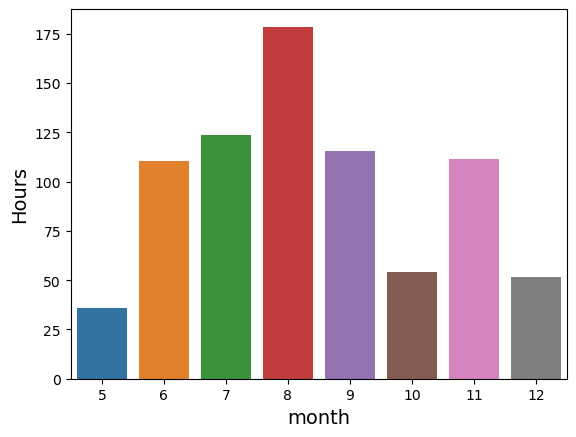

In [9]:
ax = sns.barplot(data=monthly, x="month", y="msPlayed")
ax.set_ylabel("Hours")
pass

In [10]:
daily = ahmed_stream.groupby(["day"]).agg({"msPlayed": "sum"})
daily["msPlayed"] = daily["msPlayed"].apply(lambda x: ms_to_hours(x))
daily.reset_index(inplace=True)
daily

,day,msPlayed
0,Friday,102.496087
1,Monday,101.953871
2,Saturday,120.463075
3,Sunday,141.025675
4,Thursday,104.796124
5,Tuesday,95.943626
6,Wednesday,114.193367


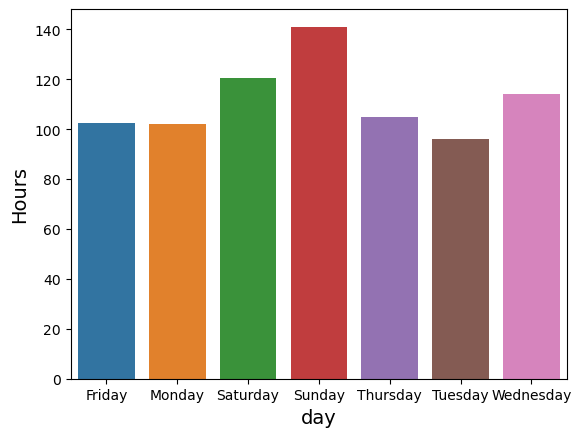

In [11]:
ax = sns.barplot(data=daily, x="day", y="msPlayed")
ax.set_ylabel("Hours")
pass

In [12]:
fav_artist = ahmed_stream.groupby(["artistName"]).agg({"msPlayed": "sum"})
fav_artist["hoursPlayed"] = fav_artist["msPlayed"].apply(lambda x: ms_to_hours(x))
fav_artist.reset_index(inplace=True)
fav_artist.sort_values(by='hoursPlayed', ascending=False, inplace=True)
fav_artist.head()

,artistName,msPlayed,hoursPlayed
265,Eminem,146781425,40.772618
785,Tamer Hosny,99354941,27.598595
46,Alan Walker,67476385,18.743440
732,Shahyn,65985758,18.329377
366,Imagine Dragons,65564846,18.212457


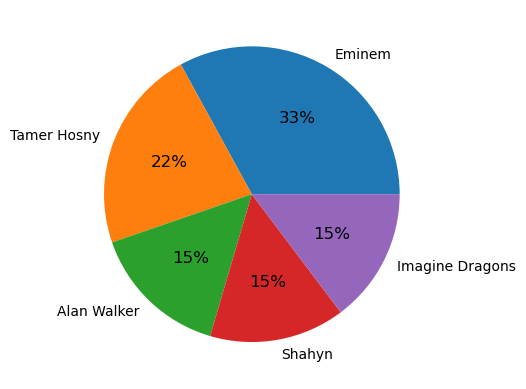

In [13]:
plt.pie(fav_artist["hoursPlayed"][:5], labels=fav_artist["artistName"][:5], autopct='%.0f%%')
pass

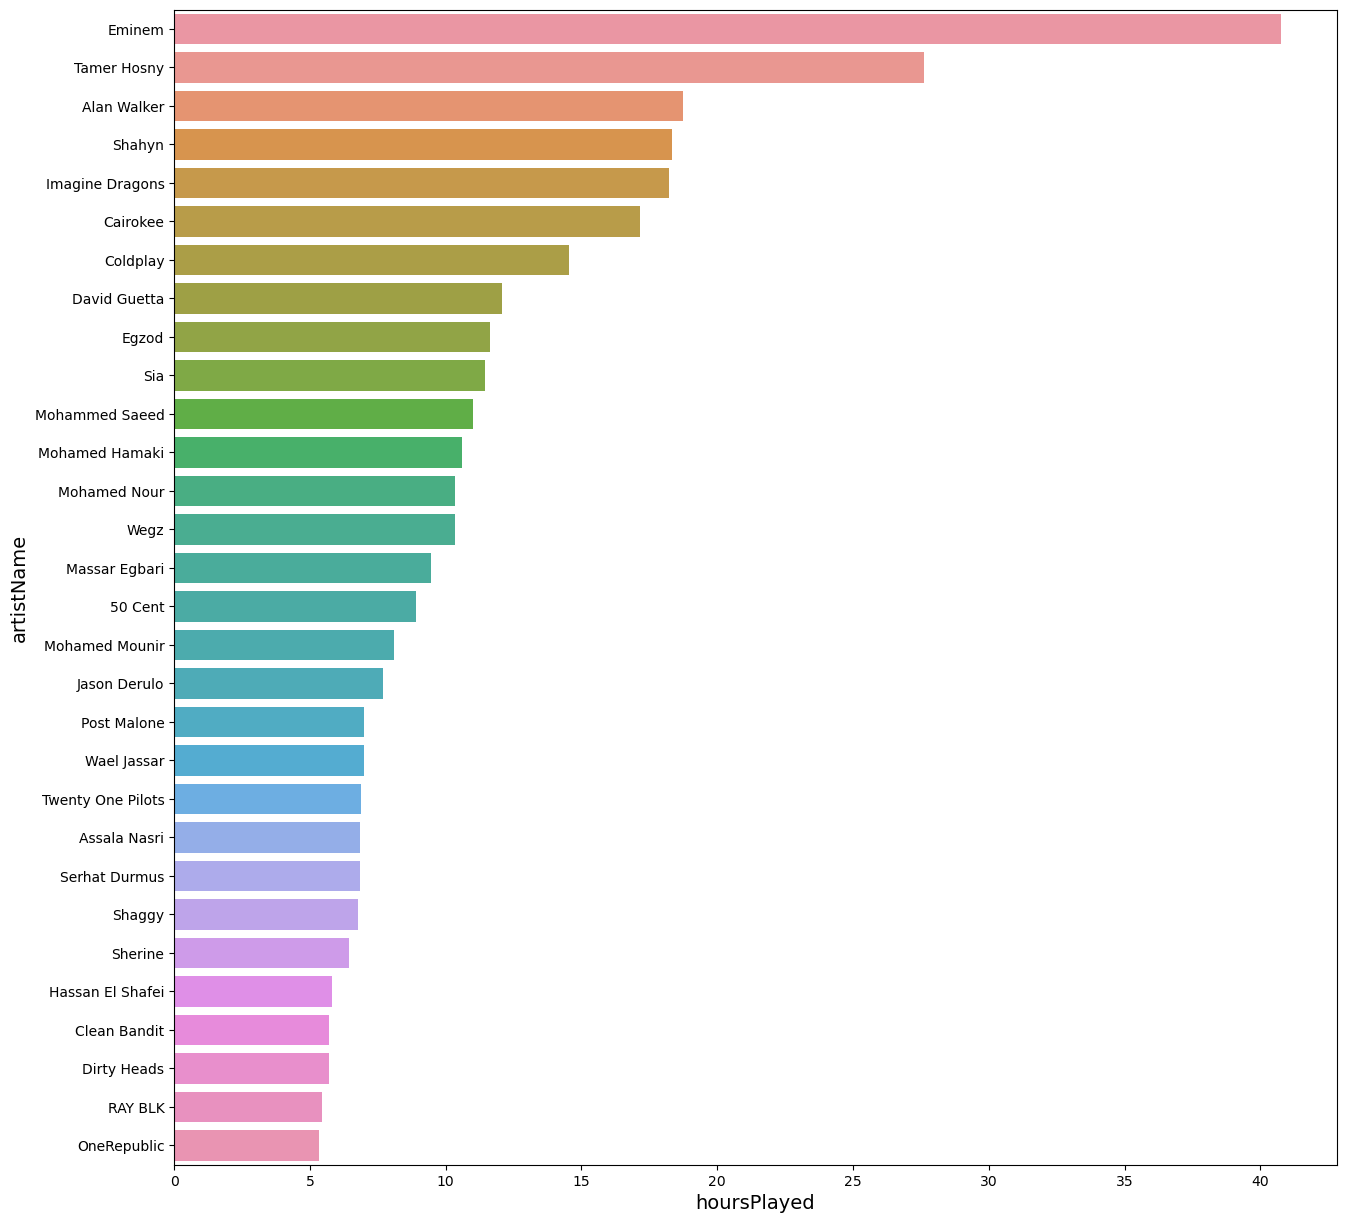

In [14]:
plt.rcParams["figure.figsize"] = (15,15)
sns.barplot(y = fav_artist["artistName"][:30], x = fav_artist["hoursPlayed"])
pass

In [15]:
daily_heat = ahmed_stream[["msPlayed"]]
daily_heat["date"] = ahmed_stream["endTime"].dt.normalize()
daily_heat = daily_heat.groupby(["date"]).agg({"msPlayed": "sum"})
daily_heat["msPlayed"] = daily_heat["msPlayed"].apply(lambda x: ms_to_hours(x) * 60)
daily_heat.head()

,msPlayed
date,
2022-05-01,20.732883
2022-05-02,74.877933
2022-05-03,12.094650
2022-05-17,67.780350
2022-05-18,303.485017


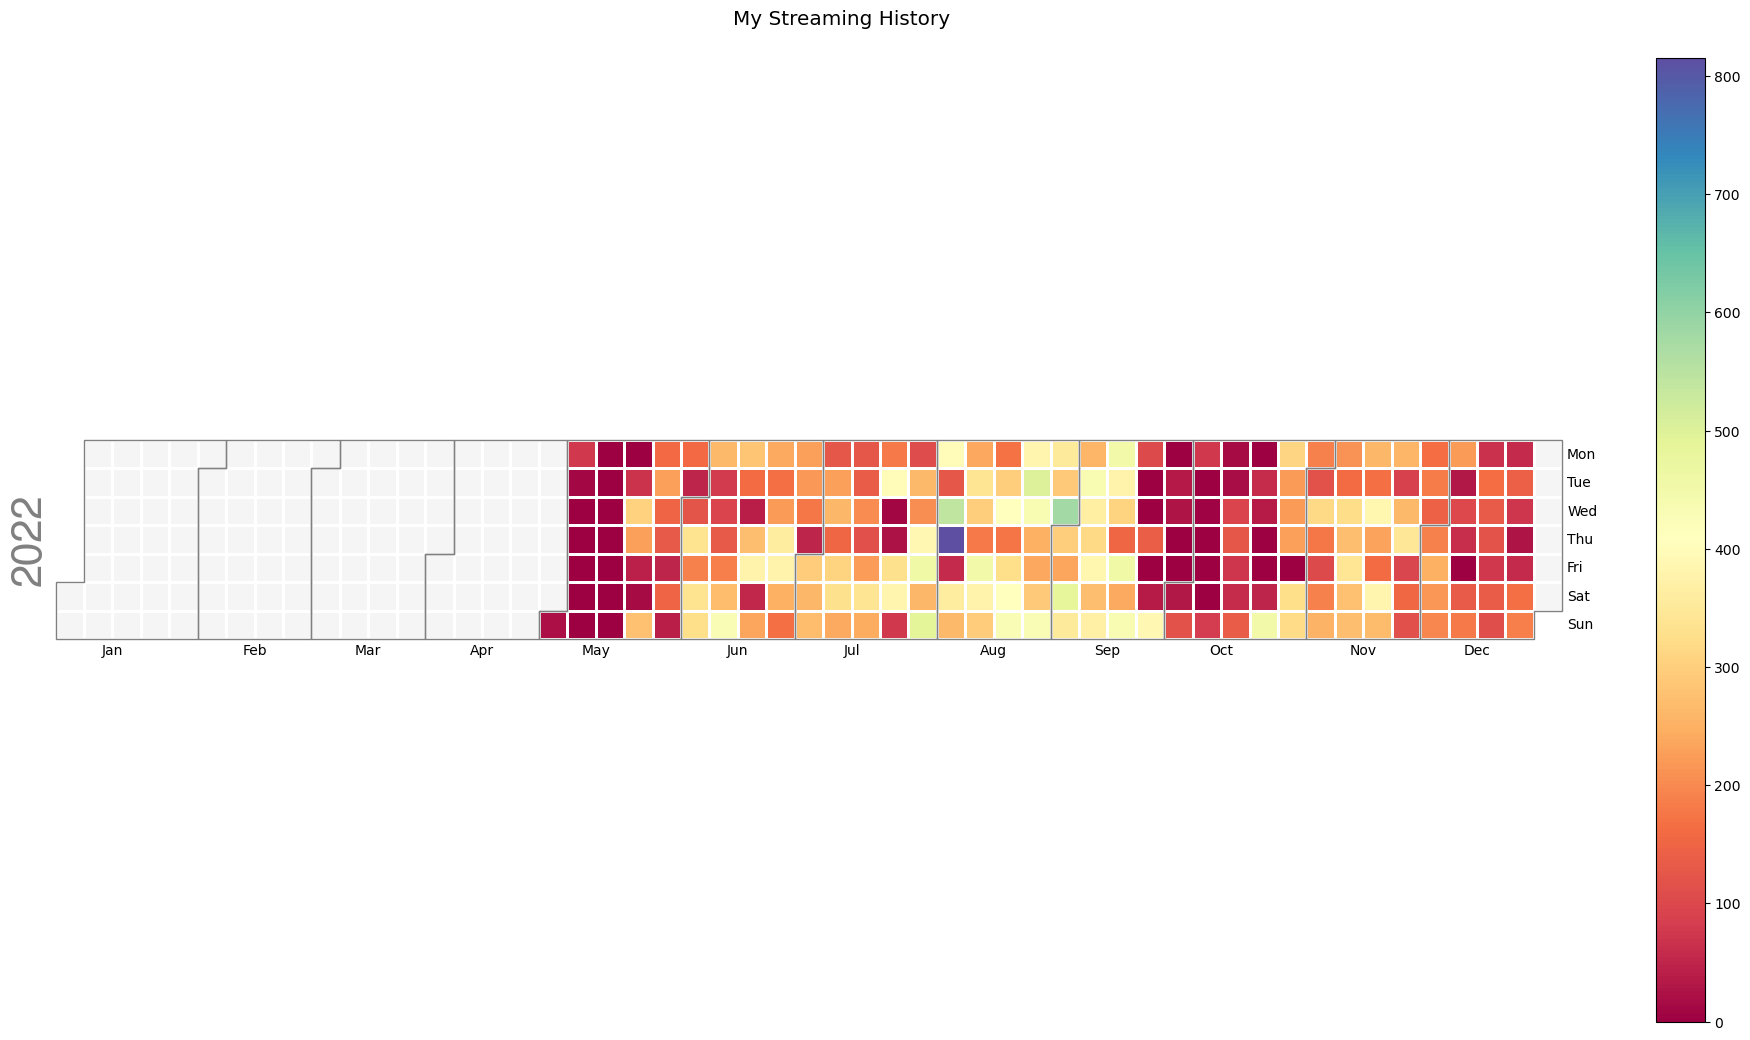

In [16]:
calplot.calplot(
    daily_heat.squeeze(), 
    figsize=(20,10), 
    suptitle='My Streaming History', 
    cmap='Spectral'
)
pass

In [17]:
full_data_df = ahmed_stream.set_index("uri").join(songs_audio.set_index("id"))
full_data_df["endTime"] = full_data_df["endTime"].dt.normalize()
full_data_df.rename(columns={"endTime": "date"}, inplace=True)
full_data_df = full_data_df[full_data_df.index.notnull()]
full_data_df.head(5)

,date,artistName,trackName,msPlayed,month,day,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
004ls73ZeoFGAD1yP7RUvY,2022-06-28,Sherine,Ya Betfaker Ya Bet7es,0,6,Tuesday,0.545,0.676,3.0,-6.152,...,0.0,0.116,0.524,143.973,audio_features,spotify:track:004ls73ZeoFGAD1yP7RUvY,https://api.spotify.com/v1/tracks/004ls73ZeoFG...,https://api.spotify.com/v1/audio-analysis/004l...,210000.0,4.0
004ls73ZeoFGAD1yP7RUvY,2022-08-12,Sherine,Ya Betfaker Ya Bet7es,3030,8,Friday,0.545,0.676,3.0,-6.152,...,0.0,0.116,0.524,143.973,audio_features,spotify:track:004ls73ZeoFGAD1yP7RUvY,https://api.spotify.com/v1/tracks/004ls73ZeoFG...,https://api.spotify.com/v1/audio-analysis/004l...,210000.0,4.0
004ls73ZeoFGAD1yP7RUvY,2022-09-14,Sherine,Ya Betfaker Ya Bet7es,2400,9,Wednesday,0.545,0.676,3.0,-6.152,...,0.0,0.116,0.524,143.973,audio_features,spotify:track:004ls73ZeoFGAD1yP7RUvY,https://api.spotify.com/v1/tracks/004ls73ZeoFG...,https://api.spotify.com/v1/audio-analysis/004l...,210000.0,4.0
009ImBOrIUlWgla8U05RAC,2022-08-21,Katy Perry,Unconditionally,168042,8,Sunday,0.432,0.725,7.0,-4.862,...,0.0,0.208,0.353,128.902,audio_features,spotify:track:009ImBOrIUlWgla8U05RAC,https://api.spotify.com/v1/tracks/009ImBOrIUlW...,https://api.spotify.com/v1/audio-analysis/009I...,228879.0,4.0
009ImBOrIUlWgla8U05RAC,2022-08-21,Katy Perry,Unconditionally,37184,8,Sunday,0.432,0.725,7.0,-4.862,...,0.0,0.208,0.353,128.902,audio_features,spotify:track:009ImBOrIUlWgla8U05RAC,https://api.spotify.com/v1/tracks/009ImBOrIUlW...,https://api.spotify.com/v1/audio-analysis/009I...,228879.0,4.0


In [18]:
idx = pd.DataFrame(
    pd.date_range(
        min(full_data_df.date), 
        max(full_data_df.date)
    ),
    columns=['date']
)

valence = full_data_df.groupby('date')['valence'].agg(
    ['min', np.mean, 'max']
)
mode = valence.join(idx.set_index('date'))
mode.reset_index(inplace=True)
mode.head()

,date,min,mean,max
0,2022-05-01,0.0943,0.570538,0.897
1,2022-05-02,0.1570,0.719548,0.896
2,2022-05-03,0.8300,0.830000,0.830
3,2022-05-17,0.1240,0.438300,0.817
4,2022-05-18,0.1410,0.538570,0.969


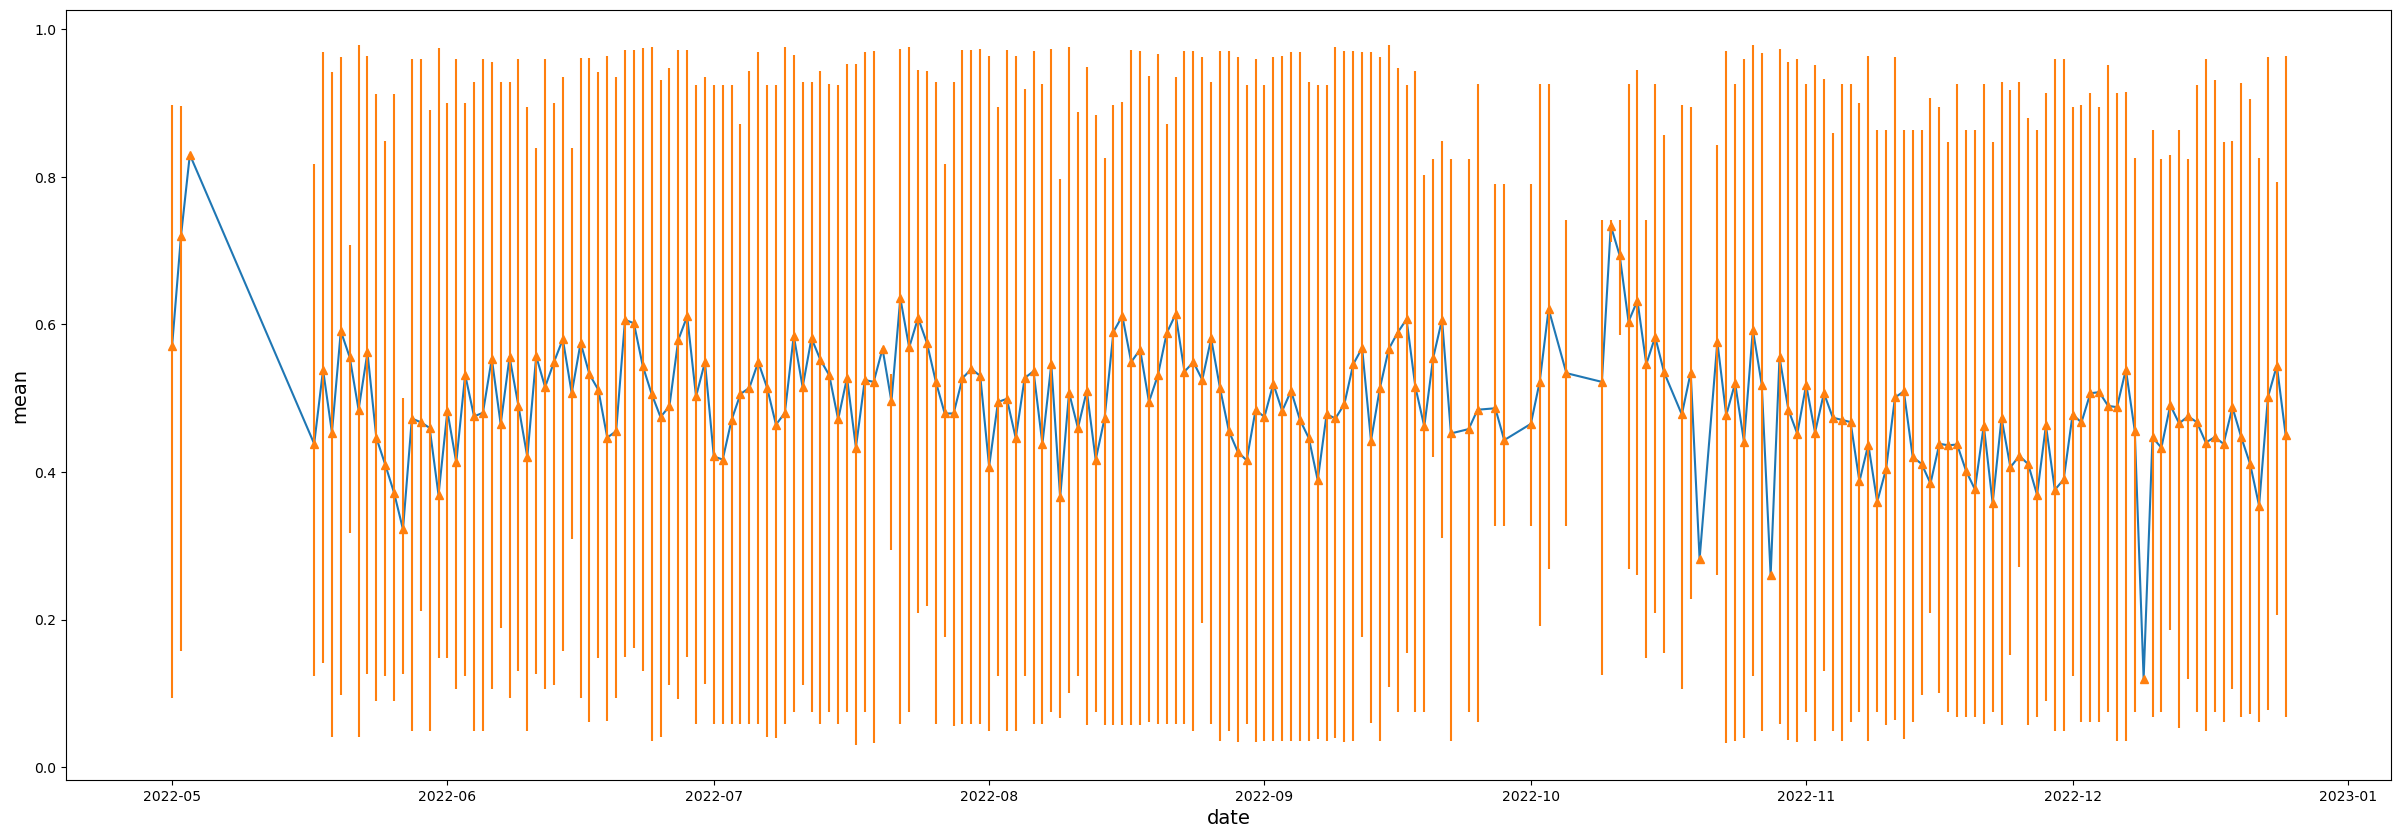

In [19]:
plt.rcParams["figure.figsize"] = (30,10)
sns.lineplot(data=mode, x="date", y="mean")
plt.errorbar(
    mode["date"],
    mode["mean"], 
    [mode["mean"] - mode['min'], mode['max'] - mode["mean"]], 
    linestyle='None',marker='^'
)
pass


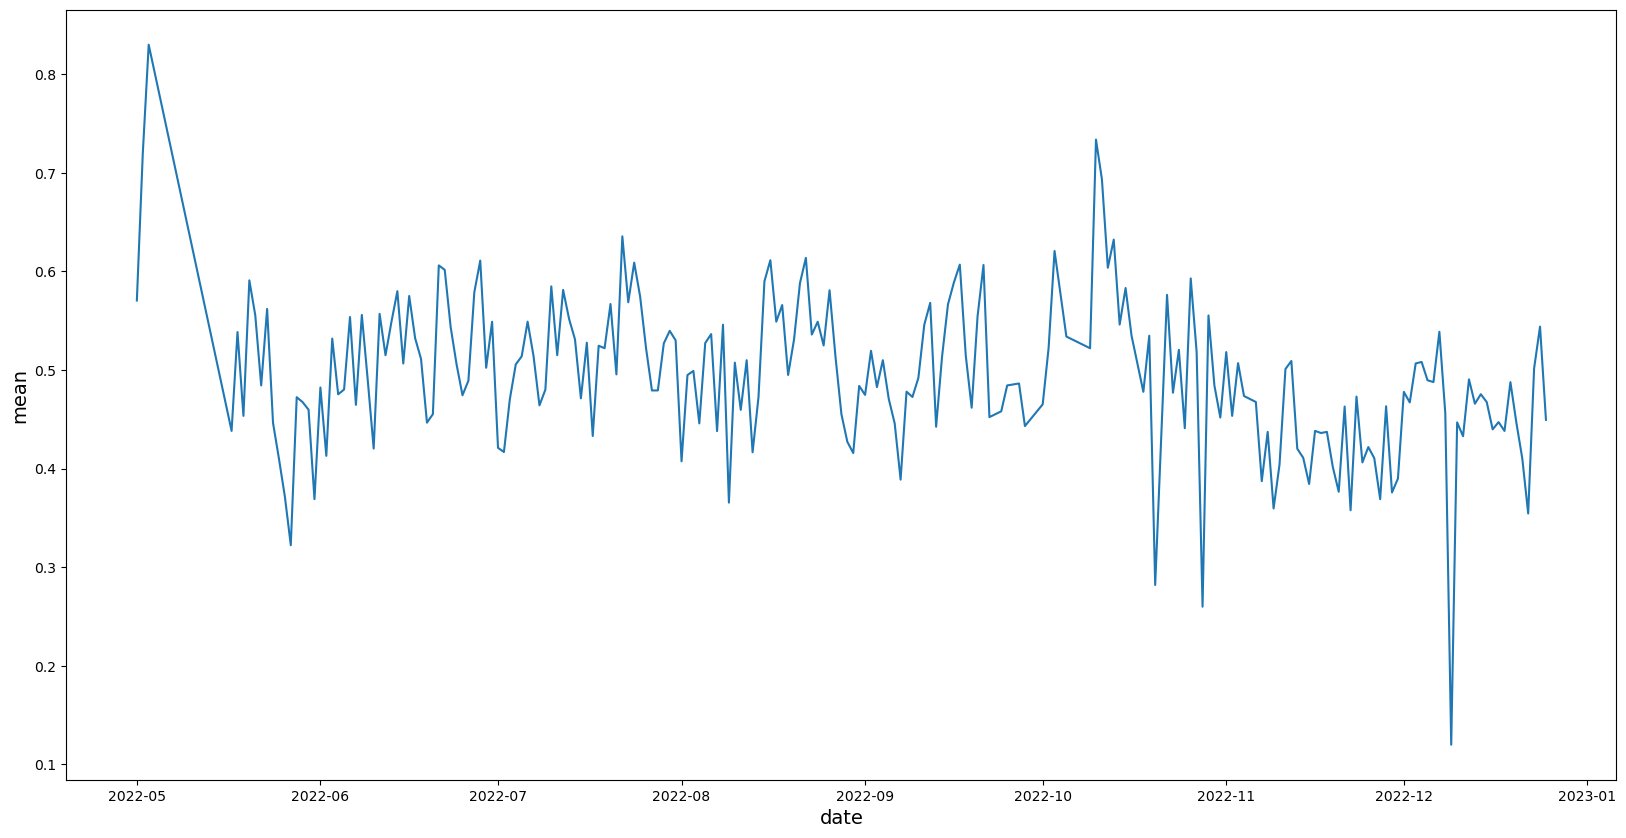

In [20]:
plt.rcParams["figure.figsize"] = (20,10)
sns.lineplot(data=mode, x="date", y="mean")
pass

In [21]:
music_features = songs_audio[
    ['danceability', 
     'energy', 
     'speechiness', 
     'acousticness', 
     'liveness', 
     'valence']
]

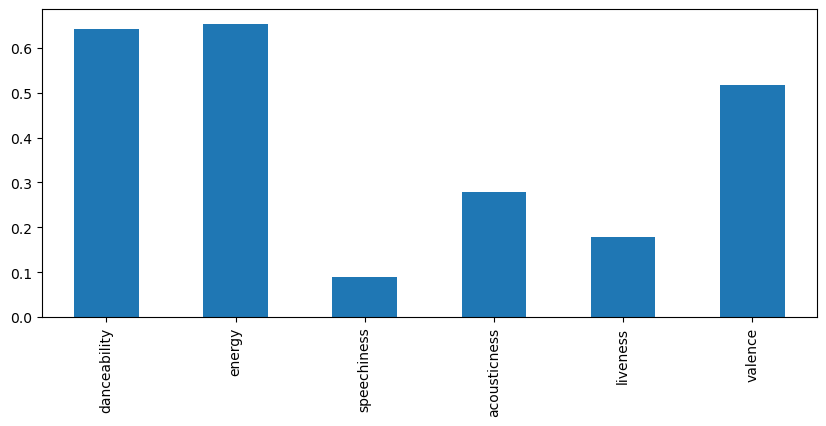

In [22]:
plt.figure(figsize=(10,4))
music_features.mean().plot.bar()
pass

In [23]:
feats = [
    'danceability', 
    'energy', 
    'key', 
    'loudness' ,
    'speechiness', 
    'acousticness', 
    'instrumentalness', 
    'liveness', 
    'valence',
    'tempo'
]

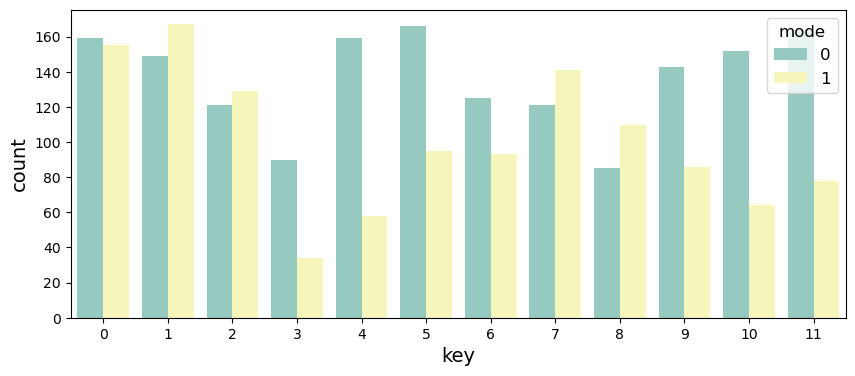

In [24]:

plt.figure(figsize=(10,4))
sns.countplot(
    data=songs_audio, 
    x='key', 
    hue='mode', 
    palette = 'Set3'
)
pass


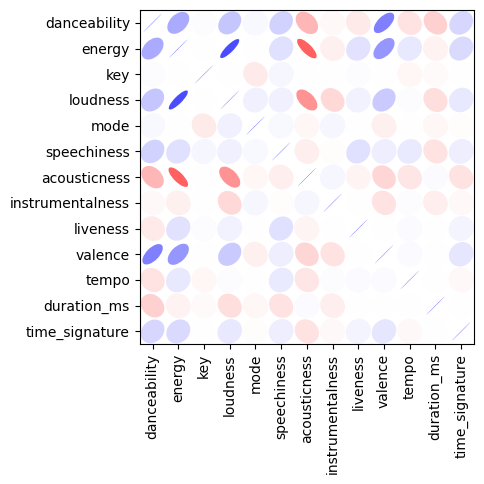

In [26]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(songs_audio.corr(), figsize=(6, 5), cmap='bwr_r')

plt.tight_layout()
plt.show()